# Analysis of Hate Crimes in the United States

## Introduction and Background

Hate crime statistics were downloaded from the Federal Bureau of Investigation (FBI) Crime Data Explorer (CDE). The data contain hate crimes reported between 1991 and 2020. All data are at the incident level. The FBI defines a hate crime as a crime that is "motivated in whole, or in part, by an offender’s bias against the victim’s perceived race, gender, gender identity, religion, disability, sexual orientation, or ethnicity."

## Executive Summary

The researchers (Sakshi and Abbie) determined 4 primary topics to explore for their analysis:
1. What have been the overall trends of hate crime frequency over the years? 
2. Do the number of hate crimes vary by region of the United States? 
3. How common are multiple offenses vs. single offenses and are they related to multiple vs. single bias?
4. What is the average number of victims for one hate crime? Is it common for a hate crime to involve multiple victims?

After analyzing these questions, the researchers determined that... 

It is not common for the FBI to categorize multiple offenses and/or multiple biases with a single hate crime. Rather, it is much more common for one hate crime to involve and single offense/single bias. If a hate crime *does* involve multiple, it is more common to have multiple offenses per hate crime, as opposed to multiple biases. It was also determined that there is a statistically significant relationship between offense (multiple vs. single) and bias (multiple vs. single). However, more tests would be needed to determine strength or association of this relationship. 

This analysis also determined that the average hate crime (as reported to the FBI) involves approximately 1 victim. After filtering the data for hate crimes involving multiple victims, the average was moved slightly higher to approximatley 3 victims. There were also extreme outliers of victim counts in the data set. It was concluded that the overwhelming majority of hate crimes involve fewer than 10 victims. Higher victim counts for one hate crime *do* occur, but they are definitely rare. Among hate crimes with multiple victims, about 0.12% of hate crimes involved more than 30 victims, 0.44% involved 11 to 29 victims, and 99.44% involved 2 to 10 victims. When looking at the entire data set, 89.29% (n=219,577) involved a single victim and 10.71% of hate crimes involved multiple victims (n=26,343). 

Please note, this analysis was exploratory and more research should be conducted to better understand any associations between variables. 

Please refer to code below to better understand the methods and details of the analysis

##  Methods

### Load all dependencies 

First the following modules were imported to conduct the analysis. The csv file was also downloaded.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


# Import csv file from FBI CDE website
fbi_crime = "hate_crime.csv"
hate_crime_df = pd.read_csv(fbi_crime, low_memory=False)

### Initial Exploration of Data

Next, the data were explored for very basic summary statistics in order to help guide our questions.

In [3]:
# View data frame to get basic idea of data
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
# Describe the numeric variables in the data set to obtain basic statistics
hate_crime_df.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,2.195770e+05,219577.000000,51411.000000,49539.000000,219577.000000,47130.000000,47123.000000,219577.000000,216098.000000
mean,2.080389e+05,2005.472691,0.658867,0.085327,0.955724,0.548207,0.099081,1.247567,0.984715
std,3.251394e+05,8.591466,1.238581,0.513304,1.358364,0.844695,0.482898,2.274116,1.173726
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.489600e+04,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.097900e+05,2005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.646850e+05,2013.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.358628e+06,2020.000000,146.000000,60.000000,99.000000,60.000000,20.000000,900.000000,147.000000


In [5]:
# Display all variable names
print(hate_crime_df.columns)

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')


# Research Questions

After initial exploration of the data, four primary research questions were determined. The questions, along with their methods and results are outlined below.

### 1) What have been the overall trends of hate crime frequency over the years?

Sakshi to add

### 2) Do the number of hate crimes vary by region of the United States?

Sakshi to add

### 3) How common are multiple offenses/biases vs. single offenses/biases? Are they related to each other?

An 'offense' is a crime committed by a person. One person can commit either one offense (single offense) or multiple offenses. 
A 'bias' in this data set is a prejudice and/or hateful reason for committing the crime that is based around the victim's perceived or real identity (i.e. bias against a gender, race, religion, etc.). An offender can have one bias (single bias) that motivates a hate crime or several (multiple bias). 

To determine whether single offenses/biases were more common than multiple offenses/biases, the hate crime data frame was grouped by 'multiple offense' and then later grouped by 'multiple bias.' Counts for both groups were obtained to view the differing frequencies.

**Offense**

In [2]:
# Group by 'multiple offense' to see if multiple or single offenses are more common
# Count by incident_id to obtain total values
offense_type = hate_crime_df.groupby('MULTIPLE_OFFENSE')['INCIDENT_ID'].count()
offense_type

MULTIPLE_OFFENSE
M      9720
S    209857
Name: INCIDENT_ID, dtype: int64

**Bias**

In [3]:
# Group by 'multiple bias' to see if multiple or single biases are more common
# Count by incident_id to obtain total values
bias_type = hate_crime_df.groupby('MULTIPLE_BIAS')['INCIDENT_ID'].count()
bias_type

MULTIPLE_BIAS
M      1019
S    218558
Name: INCIDENT_ID, dtype: int64

**Offense and Bias**

Next, both groups were placed in a data frame in order to summarize by their proportions (rather than counts only).

In [4]:
# Create a data frame that displays the counts of multiple offense vs. single offense, as well as the counts for multiple
  # bias vs. single bias. Also include the proportions for both, so that it is easier to interpret. 

# Create data frame
offense_bias = pd.DataFrame({'Offense':offense_type,
                            'Proportion_Offense':offense_type/sum(offense_type), #calculate proportion 
                             'Bias':bias_type,
                             'Proportion_Bias':bias_type/sum(bias_type) #calculate proportion
                            })
offense_bias

,Offense,Proportion_Offense,Bias,Proportion_Bias
M,9720,0.044267,1019,0.004641
S,209857,0.955733,218558,0.995359


The data clearly show that a single offense/bias is much more common than multiple offenses/biases. Specifically, about 4.43% of hate crimes in our data set involved multiple offenses, vs. 95.57% involving a single offense. 

This difference was even more pronounced when looking at bias. Less than 1% (0.46%) of hate crimes in our data set involved multiple biases vs. 99.44% of hate crimes involved a single bias.

**Visualizing these proportions**

To truly see the wide range between multiple offenses/biases vs. single offenses/biases, the data were ploted through a bar chart.

We can clearly see that hate crimes involving a single offense/bias are much more common than hate crimes involving multiple offenses/biases.

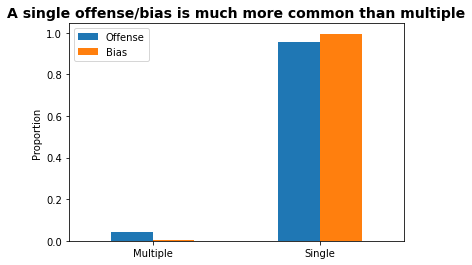

In [19]:
# Create a bar plot to visually display the proportions
fig = offense_bias[['Proportion_Offense', 'Proportion_Bias']].plot(kind='bar', 
                                       xlabel='',
                                       ylabel='Proportion')
plt.xticks(rotation=0)
plt.title('A single offense/bias is much more common than multiple', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fancybox=True, framealpha=1, borderpad=1)
fig.set_xticklabels(['Multiple','Single'])
fig.legend(labels=['Offense','Bias'])

# Save figure and then display
plt.savefig('OffenseBiasBar.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

**Multiple Offenses/Biases only**

The visual above is meant to provide an overall picture of the data (how much more common single offenses/biases are than multiple).

An additional chart was created to "zoom in" to the multiple offenses/biases group. This allows us to better visualize the differences between multiple offenses and multiple biases.

In [21]:
# First, we slice the data frame to only include the first row, which represents multiple biases/offenses.
M_only = pd.DataFrame(offense_bias.loc[['M']])
M_only # display the data

,Offense,Proportion_Offense,Bias,Proportion_Bias
M,9720,0.044267,1019,0.004641


The chart below better displays that having multiple offenses for one hate crime is more common than having multiple biases in one hate crime. Because the proportions for the 'multiple' group were so small, a separate visual for this group was necessary.

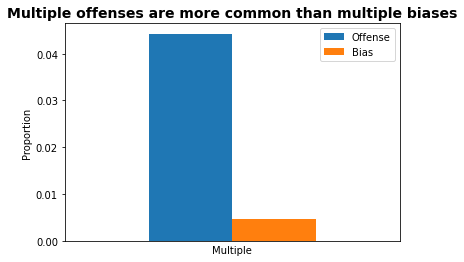

In [22]:
# Create a bar plot to visually display the proportions
fig = M_only[['Proportion_Offense', 'Proportion_Bias']].plot(kind='bar', 
                                       xlabel='Multiple',
                                       ylabel='Proportion')
plt.xticks(rotation=45)
plt.title('Multiple offenses are more common than multiple biases', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fancybox=True, framealpha=1, borderpad=1)
fig.legend(labels=['Offense','Bias'])
fig.set_xticks([])

# Save figure and then display
plt.savefig('multbar.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

**Next, we determine whether biases and offenses are related to each other?**

Because the "offense" and "bias" variables are both categorical and dichotomous (M vs. S), we can run a Chi-square analysis to see whether the two variables are related or not.

The null hypothesis is that offense number and bias number are independent of each other. The alternative hypothesis (what we are testing for) is that offense number is *dependent* upon bias number.

To do this, we have to gather the "observed" numbers in our data set: (multiple offense with multiple bias; multiple offense with single bias; single offense with multiple bias; single offense with single bias). We have to compare the observed values to what we would "expect" to see in our population. We compare the observed and the expected to determine whether the difference between observed and expected happened just by chance (not significant), OR whether the difference is unlikely to happen just by chance (significant). If the test is significant, there is likely some sort of relationship between offense number and bias number. 

**Determine how many incidents involved multiple bias AND multiple offense**

Answer: 235 incidents

In [23]:
# Check to see when there was a multiple offense with a multiple bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')]

# This indicates 235 occurences involved multiple bias with multiple offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')].index)

235

**Determine how many incidents involved single bias AND single offense**

Answer: 209,073 incidents

In [24]:
# Check to see when there was a single offense with a single bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')]

# This indicates 209,073 occurences involved a single bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')].index)

209073

**Determine how many incidents involved multiple bias AND single offense**

Answer: 784 incidents

In [25]:
# Check to see when there was a single offense with multiple bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')]

# This indicates that 784 occurences involved multiple bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='M') & (hate_crime_df['MULTIPLE_OFFENSE']=='S')].index)

784

**Determine how many incidents involved single bias AND multiple offense**

Answer: 9485 incidents

In [26]:
# Check to see when there was multiple offenses with a single bias
hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')]

# This indicates that 9485 occurences involved multiple bias with a single offense

# Get length of the index of the slice to count how many
len(hate_crime_df.loc[(hate_crime_df['MULTIPLE_BIAS']=='S') & (hate_crime_df['MULTIPLE_OFFENSE']=='M')].index)

9485

Now that we know the observed values in our data frame for all of the combinations, we can add them into an array of observed values. We will call the array "observed." 

In [27]:
# Create an array with the observed values. We will need this to run the Chi-square.
observed = np.array([[235, 9485], [784, 209073]])
observed

array([[   235,   9485],
       [   784, 209073]])

In [28]:
# Calculated the statistic by hand first to compare to function from scipy.stats
## Without Yates correction value is 840.26 (Yates correction makes the value for conservative)

(((235-45.11)**2)/45.11 + ((9485-9674.89)**2)/9674.89 + ((784-973.89)**2)/973.89 + ((209073-208883.11)**2)/208883.11)

840.2642071696315

In [29]:
# Import the chi2_contingency function to use for our test
from scipy.stats import chi2_contingency 

We run the Chi-square test of independence to see if there is a statistically significant relationship between offense and bias.

In [30]:
# Run a Chi-square test of independence 

# Obtain the value of the Chi statistic (chi_val)
# Obtain p-value (p_val); check that value is less than 0.05 for significance 
# Obtain degrees of freedom (dof); should be 1, since we are using 2X2 values in our "observed" array
# Obtain 'expected', which are the values we would expected to see; these are the values we are comparing to.

# Here is the actual test (arguments are explained above)
chi_val, p_val, dof, expected =  chi2_contingency(observed, correction=True) 
            # "observed" means we are testing the data in the array called 'observed'
            # Correction = True, to use the Yates correction. 

# Keeping correction for Yates' continuity so that estimates are more conservative
chi_val, p_val, dof, expected

(835.8977781884262,
 8.461536167086276e-184,
 1,
 array([[4.51080031e+01, 9.67489200e+03],
        [9.73891997e+02, 2.08883108e+05]]))

**Chi Square Test Results and Interpretation**

The test above shows a Chi-square statistic of approximately 835.90, with 1 degree of freedom, and a p-value much less than 0.05. This suggests that there *is* a statistically significant relationship between offense number and bias number. We fail to reject the null hypothesis that offense number and bias number are independent of each other.

Please note, this test does not tell us anything about the specific nature of the relationship - only that one exists. To analyze the actual relationship, we would need to run further tests to determine strength and/or association of the relationship between offenses and biases. These additional tests are outside the scope of this exploratory analysis, but should be considered for future research.

### 4) What is the average number of victims for one hate crime? Is it common for a hate crime to involve multiple victims?

**Basic Summary Statistics**

First, we describe the 'total_individual_victims' column in our data set to get basic summary statistics. 

From this, we determine that the average number of victims for one hate crime is 1 victim (**mean=0.98**) with a standard deviation of 1.17. There is a maximum count of 147, indicating that some of the hate crimes definitely involve multiple victims.

In [31]:
# Describe the total individual victims variable in the full data set
hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS'].describe()

# The average total victims for hate crimes is 0.99 with a standard deviation of 1.17.
# The max number of victims is 147. This prompts a follow-up question of 'how many incidents involve more than 1 victim'?

count    216098.000000
mean          0.984715
std           1.173726
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         147.000000
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: float64

**Box Plot of Total Number of Victims**

To better visualize the distribution and spread of the data, a box plot was constructed. 

This box plot is overwhelmed by outliers in our data. This visual suggests that the number of victims in our sample is a very wide range, yet the vast majority of incidents do not involve many victims. As indicated by this plot, the median, 25th, and 75th percentile are all 1.

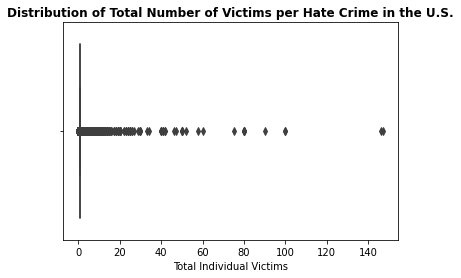

In [34]:
# Look at distribution with box plot
g = sns.boxplot(x=hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS'])
g.set_title('Distribution of Total Number of Victims per Hate Crime in the U.S.', size=12, weight='bold')
g.set_xlabel('Total Individual Victims')

# Save figure and then display
plt.savefig('fullboxplot.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

Even when removing some outliers, the box plot is still difficult to visualize. This is because the inner quartile range is 0, with the median, 25th, and 75th percentiles all equaling 1. To better see the distribution, the data were then sliced to only include values less than 20 (pictured below).

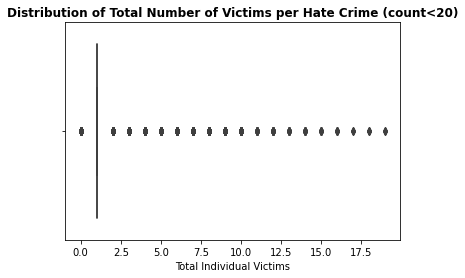

In [35]:
# Slice data for victim counts less than 20 to see how this changes the visualization.
victim_count20 =  hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS']<20
victim20 = hate_crime_df[victim_count20]

# Plot revised box plot
g = sns.boxplot(x=victim20['TOTAL_INDIVIDUAL_VICTIMS'])
g.set_title('Distribution of Total Number of Victims per Hate Crime (count<20)', size=12, weight='bold')
g.set_xlabel('Total Individual Victims')
plt.show()

**Box Plots of Total Victims by Region**

We can also view the box plots by region to see if these outliers exist in every region of the U.S., or if they are concentrated in one or two regions.

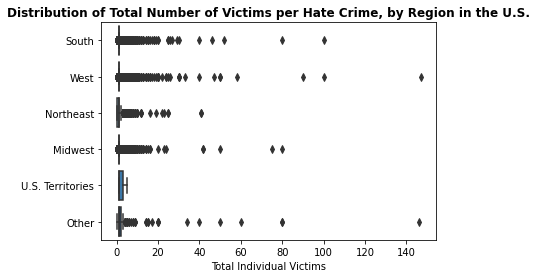

In [37]:
# See if the distribution changes at all when looking by region
g2 = sns.boxplot(y=hate_crime_df["REGION_NAME"], 
            x=hate_crime_df["TOTAL_INDIVIDUAL_VICTIMS"],
           palette="Blues")

g2.set_title('Distribution of Total Number of Victims per Hate Crime, by Region in the U.S.', size=12, weight='bold')
g2.set_xlabel('Total Individual Victims')
g2.set_ylabel('')

# Save figure and then display
plt.savefig('Regionboxplot.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

The box plot above displays that the extreme outliers are observed in every region in our sample. We can slice the data to be victim counts of less than 20 to have a better understanding.


The filtered box plots below suggest that the Northeast (on average) has fewer total victims per hate crime, when compared to other regions. The U.S territories appear to have the most total victims per hate crime (on average). However, the U.S. territories do not contain any of the outliers. The regions "other" and "west" had a hate crime with the highest total number of victims

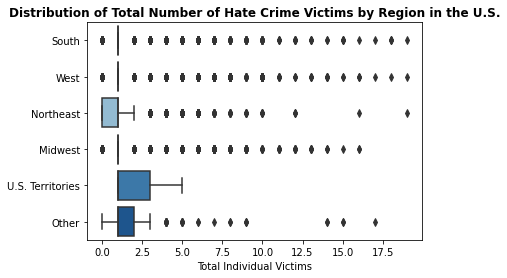

In [38]:
# See if the distribution changes at all when looking by region
fig, ax = plt.subplots()

sns.boxplot(y=victim20["REGION_NAME"], 
            x=victim20["TOTAL_INDIVIDUAL_VICTIMS"],
           palette="Blues")

ax.set_title('Distribution of Total Number of Hate Crime Victims by Region in the U.S.', size=12, weight='bold')
ax.set_xlabel('Total Individual Victims')
ax.set_ylabel('')

# Save figure and then display
plt.savefig('Regionboxplot20.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

We know from these box plots that there are definite outliers in our sample. But how many? Lets sort our data frame by the total individual victims per hate crime to get an overall sense of incidents that involve mutliple victims. 

In [15]:
# Sort by hate crime ascending to see higher victim counts
hate_crime_df.sort_values('TOTAL_INDIVIDUAL_VICTIMS', ascending=False).head()

# This initial scan displays that some hate crimes involve hundreds of victims. But how common is that?

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
54279,52221,1998,MT0510000,Toole,NaN,County,MT,Montana,Mountain,West,...,Unknown,NaN,147,Arson,147.0,Residence/Home,Anti-Other Religion,Individual,S,S
211834,1329375,2020,WAFBISE00,Federal Bureau of Investigation,Seattle,Federal,FS,Federal,Other,Other,...,Unknown,Unknown,146,Intimidation,146.0,Cyberspace,Anti-Black or African American,Individual,S,S
19305,22703,1994,CA0380100,San Francisco,NaN,City,CA,California,Pacific,West,...,Unknown,NaN,100,Intimidation,100.0,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,S,S
188869,190211,2017,GA0670200,Gwinnett County Police Department,NaN,County,GA,Georgia,South Atlantic,South,...,Unknown,NaN,200,Intimidation;Simple Assault,100.0,Church/Synagogue/Temple/Mosque,"Anti-Islamic (Muslim);Anti-Multiple Races, Group",Individual,M,M
25880,25359,1995,CA0270000,Monterey,NaN,County,CA,California,Pacific,West,...,White,NaN,90,Intimidation,90.0,Other/Unknown,Anti-Black or African American,Individual,S,S


**Exploring where total individual victims is greater than 1**

To explore this even further, the data were filtered by victim counts above 1. How does this change our distribution, if at all?

In [32]:
# Check to see when a victim count is great than 1
victim_count =  hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS']>1
victim_count.head()

0    False
1    False
2    False
3    False
4    False
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: bool

In [35]:
victim_count1 =  hate_crime_df['TOTAL_INDIVIDUAL_VICTIMS']==1
multiple_victim1 = hate_crime_df[victim_count1]
len(multiple_victim1.index)

219577

In [17]:
# Look at the data frame slice from above for victim counts greater than 1.
multiple_victim = hate_crime_df[victim_count]
multiple_victim.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
27,17,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Aggravated Assault,3.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S
33,23,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Destruction/Damage/Vandalism of Property;Intim...,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,M,S
34,24,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,2,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


After filtering the data for more than one victim, we now have a mean of 2.6 and a standard deviation of 2.65. This means the filtered data set actually has more spread than the original data set. Because the mean is larger than the median of 2, we also know what our distribution is slightly positively skewed. Because the 75% percentile is 3, we know that the higher victim counts are outliers. 

In [18]:
# Describe the TOTAL_INDIVIDUAL_VICTIMS variable when greater than 1
multiple_victim['TOTAL_INDIVIDUAL_VICTIMS'].describe() # Now we have a mean of 2.60 and standard deviation of 2.65. 
# The spread around the mean is slightly higher when filtering for victim counts above 1.

count    26343.000000
mean         2.601184
std          2.648175
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max        147.000000
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: float64

The extreme outliers make this visual difficult to interpret, but one can still see the right, positive skew in our sample distribution of multiple victims. This indicates that the vast majority of hate crimes involve 2-3 victims, but some incidents involve hundreds of victims.

<AxesSubplot:>

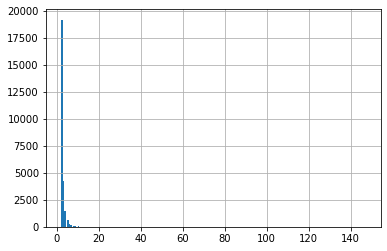

In [19]:
# quick initial scan of the new distribution 
multiple_victim['TOTAL_INDIVIDUAL_VICTIMS'].hist(bins=200)

If we categorize and group the data into 'bins' of victim counts, we might better be able to understand how common these 'extreme' cases are, where hundreds of victims are involved.

In [20]:
# Turn the slice of data into an actual data frame to work with
multiple_victim_df = pd.DataFrame(multiple_victim)
multiple_victim_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
27,17,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Aggravated Assault,3.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S
33,23,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,3,Destruction/Damage/Vandalism of Property;Intim...,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,M,S
34,24,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,NaN,2,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S


In [21]:
# Check to see how common other victim counts are
# Group by TOTAL_INDIVIDUAL_VICTIMS to see
grouped_victim_df = multiple_victim_df.groupby('TOTAL_INDIVIDUAL_VICTIMS').count() 
grouped_victim_df

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
TOTAL_INDIVIDUAL_VICTIMS,,,,,,,,,,,,,,,,,,,,,
2.0,19167,19167,19167,19167,394,19167,19167,19167,19167,19167,...,4709,19167,3338,19167,19167,19167,19167,19167,19167,19167
3.0,4268,4268,4268,4268,95,4268,4268,4268,4268,4268,...,971,4268,661,4268,4268,4268,4268,4268,4268,4268
4.0,1503,1503,1503,1503,42,1503,1503,1503,1503,1503,...,355,1503,240,1503,1503,1503,1503,1503,1503,1503
5.0,627,627,627,627,27,627,627,627,627,627,...,140,627,100,627,627,627,627,627,627,627
6.0,293,293,293,293,12,293,293,293,293,293,...,68,293,46,293,293,293,293,293,293,293
7.0,132,132,132,132,5,132,132,132,132,132,...,30,132,24,132,132,132,132,132,132,132
8.0,89,89,89,89,3,89,89,89,89,89,...,26,89,16,89,89,89,89,89,89,89
9.0,54,54,54,54,4,54,54,54,54,54,...,14,54,11,54,54,54,54,54,54,54
10.0,63,63,63,63,3,63,63,63,63,63,...,8,63,5,63,63,63,63,63,63,63


In [22]:
# Establish bins and bin labels for victim counts
victim_bins = [1, 10, 29, 147]
victim_labels = ['2-10', '11-29', '30+']

# Create a new variable in the 'multiple_victim' data frame that categorizes the victim counts
multiple_victim_df['Number_of_Victims'] = pd.cut(multiple_victim_df["TOTAL_INDIVIDUAL_VICTIMS"], 
                                                    victim_bins, labels=victim_labels)

# Check that data frame has new column
multiple_victim_df

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Number_of_Victims
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S,2-10
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,2-10
27,17,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,NaN,3,Aggravated Assault,3.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S,2-10
33,23,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,NaN,3,Destruction/Damage/Vandalism of Property;Intim...,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,M,S,2-10
34,24,1991,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,NaN,2,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S,2-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219512,1349212,2020,WV0350100,Wheeling,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,2,Intimidation,2.0,Residence/Home,Anti-White,Individual,S,S,2-10
219551,1283434,2020,WVWSP3800,State Police:,Point Pleasant,State Police,WV,West Virginia,South Atlantic,South,...,Unknown,2,Burglary/Breaking & Entering,2.0,Residence/Home,"Anti-Eastern Orthodox (Russian, Greek, Other)",Individual,S,S,2-10
219559,661207,2020,WY0010100,Laramie,NaN,City,WY,Wyoming,Mountain,West,...,Not Hispanic or Latino,2,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Hispanic or Latino,Individual,S,S,2-10
219569,1009279,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,Not Hispanic or Latino,2,Aggravated Assault,2.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S,2-10


In [24]:
# Group by the new 'Number_of_Victims' variable that we just created
victim_group = multiple_victim_df.groupby('Number_of_Victims')

# Get the total incidents per bin in order to compare
victim_counts = victim_group.agg({"Number_of_Victims": 'count'})
victim_counts

,Number_of_Victims
Number_of_Victims,
2-10,26196
11-29,115
30+,32


The plot below displays that the vast majority of hate crimes involving multiple victims involve 2-10 victims. Hate crimes involving 11-29 victims are rare, but are slightly more common than hate crimes involving 30 or more victims. 

<AxesSubplot:xlabel='Number_of_Victims'>

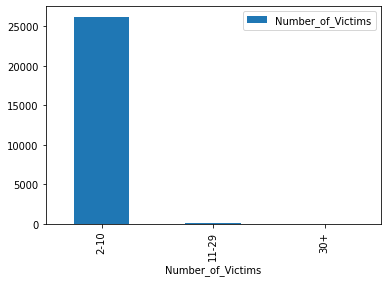

In [25]:
#Initial bar plot
victim_counts.plot(kind='bar')

In [54]:
# Finally, compare single victims to multiple
    # 219577 = total number of hate crimtes with only one victim
    # 26343 = total number of hate crimes with 2+ victims
    # 245920 = total number of individual hate crimes in data set
prop1 = 219577/245920
prop2 = 26343/245920
victim_compare = np.array([prop1,prop2])

0.10712020169160702

In [80]:
# Compare using a treemap
labels=['One Victim (89%)','Multiple Victims (11%)']

# Import squarify for tree map
import squarify

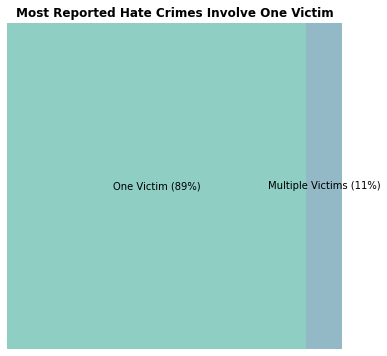

In [79]:
# Set up tree map; use array we created above for the data
fig, ax = plt.subplots(1, figsize = (6,6))
squarify.plot(sizes=victim_compare, 
              label=labels, 
              alpha=.5 )
plt.axis('off') # remove axis

# Add title
ax.set_title('Most Reported Hate Crimes Involve One Victim', size=12, weight='bold')
plt.show()

# Save plot
fig.savefig('treemap.png', dpi=150, bbox_inches="tight")